In [82]:
import numpy as np
np.set_printoptions(legacy='1.25')
import pandas as pd

dataset = pd.read_csv("../files/input/auto_mpg.csv")
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [83]:
#
# Tamaño del dataset
#
dataset.shape

(398, 8)

In [84]:
#
# Búsqueda de valores nulos
#
dataset.isna().sum()


MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [85]:
#
# Se eliminan los registros nulos
#
dataset = dataset.dropna()
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [86]:
# Columna Origin
# Nota:  1) USA
#        2) Europe
#        3) Japan
dataset.Origin.value_counts()

Origin
1    245
3     79
2     68
Name: count, dtype: int64

In [87]:
#
# Convierte la columna a categorias
# Nota. Realmente no se debería hacer asi para aplicaciones
# en productivo
#
dataset["Origin"] = dataset["Origin"].map(
    {1: "USA", 2: "Europe", 3: "Japan"},
)

dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


In [88]:
#
# Genera variables dummy para indicar la procedencia
#
dataset = pd.get_dummies(dataset, columns=["Origin"], prefix="", prefix_sep="")
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True


In [89]:
#
# Note que aca no se usa train_test_split
#
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

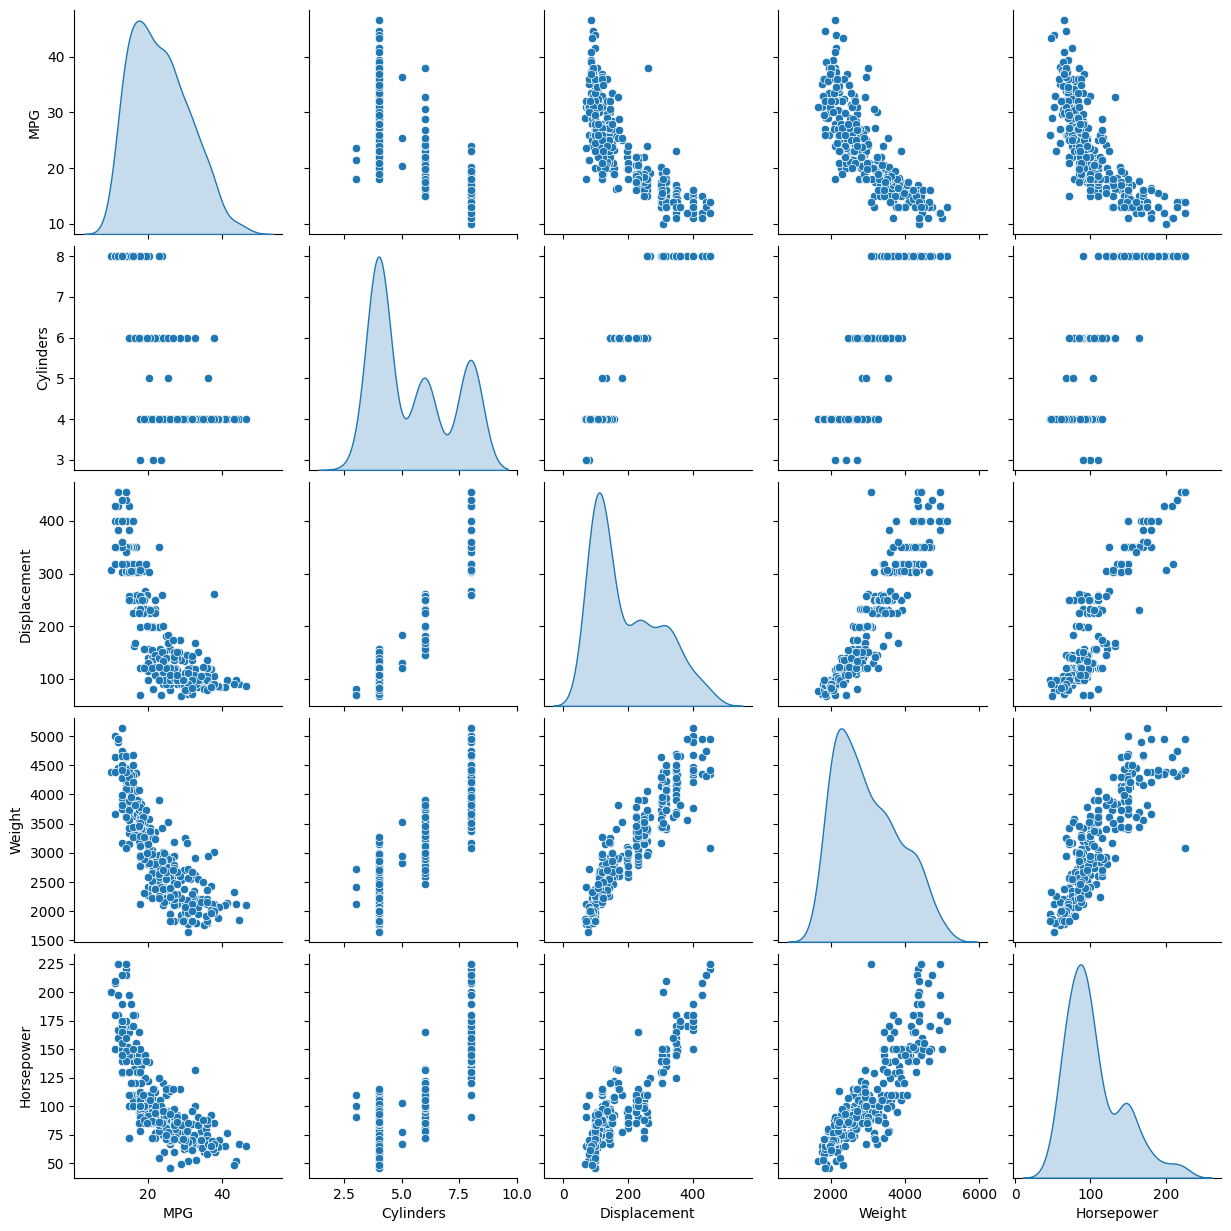

In [90]:
#
# Las millas por galon (MPG) son función de las demas variables.
#
import seaborn as sns  #  type: ignore

sns.pairplot(
    train_dataset[["MPG", "Cylinders", "Displacement", "Weight","Horsepower"]], diag_kind="kde"
)

In [91]:
#
# Cálculo de algunas estadísticas generales
#
train_dataset.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0


In [92]:
#
# Particion de los datos
#
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop("MPG")
test_labels = test_features.pop("MPG")


In [93]:
train_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,28.0,4,90.0,75.0,2125.0,14.5,74,False,False,True
282,22.3,4,140.0,88.0,2890.0,17.3,79,False,False,True
69,12.0,8,350.0,160.0,4456.0,13.5,72,False,False,True
378,38.0,4,105.0,63.0,2125.0,14.7,82,False,False,True
331,33.8,4,97.0,67.0,2145.0,18.0,80,False,True,False
...,...,...,...,...,...,...,...,...,...,...
281,19.8,6,200.0,85.0,2990.0,18.2,79,False,False,True
229,16.0,8,400.0,180.0,4220.0,11.1,77,False,False,True
150,26.0,4,108.0,93.0,2391.0,15.5,74,False,True,False
145,32.0,4,83.0,61.0,2003.0,19.0,74,False,True,False


In [94]:
# Estandarizacion de los datos
#
train_dataset.describe().transpose()[["mean", "std"]]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642


In [95]:

#
# Efecto del StandardScaler
#
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

pd.DataFrame(
    data=scaler.fit_transform(train_dataset),
    columns=train_dataset.columns,
).describe().transpose()[["mean", "std"]]



,mean,std
MPG,-2.206303e-16,1.001596
Cylinders,2.022444e-16,1.001596
Displacement,7.990777e-17,1.001596
Horsepower,-1.980016e-17,1.001596
Weight,-9.051500e-17,1.001596
Acceleration,-5.275327e-16,1.001596
Model Year,9.419217e-16,1.001596
Europe,3.394312e-17,1.001596
Japan,2.828594e-18,1.001596
USA,1.697156e-17,1.001596


In [96]:
#
# Preparación de la data
#
horsepower_scaler = StandardScaler()

train_horsepower = train_features[["Horsepower"]]
test_horsepower = test_features[["Horsepower"]]

horsepower_scaler.fit(train_horsepower)

standarized_train_horsepower = horsepower_scaler.transform(train_horsepower)
standarized_test_horsepower = horsepower_scaler.transform(test_horsepower)

In [97]:

#
# Modelo de regresión lineal
#
from sklearn.linear_model import LinearRegression

horsepower_model = LinearRegression()
horsepower_model.fit(standarized_train_horsepower, train_labels)



LinearRegression()

In [98]:
#
# Intercepto
#
horsepower_model.intercept_

23.31050955414013

In [99]:
#
# Coeficientes
#
horsepower_model.coef_

array([-5.89948889])

In [100]:

#
# Predicción. Preparación de las variables independientes
#

x = pd.DataFrame({"Horsepower": np.linspace(0, 250, 251)})
x.head()

,Horsepower
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0


In [101]:
#
# Predicción
#
scaled_x = horsepower_scaler.transform(x)
y = horsepower_model.predict(scaled_x)
y[:5]


array([39.57626034, 39.42115555, 39.26605075, 39.11094596, 38.95584117])

In [102]:
import matplotlib.pyplot as plt


def plot_horsepower(x, y):
    plt.scatter(train_features["Horsepower"], train_labels, label="Data")
    plt.plot(x, y, color="k", label="Predictions")
    plt.xlabel("Horsepower")
    plt.ylabel("MPG")
    plt.legend()
    

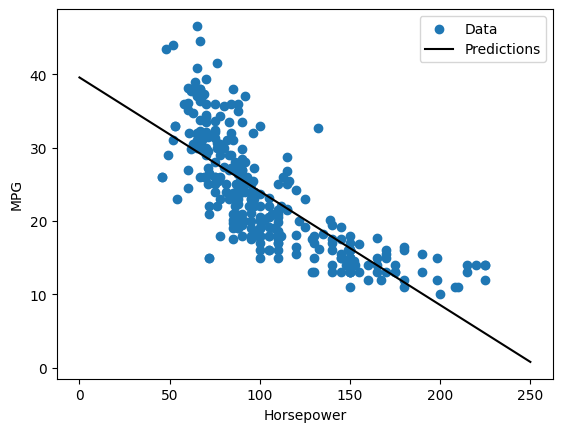

In [103]:
plot_horsepower(x, y)

In [104]:
#
# Evaluación
#
from sklearn.metrics import mean_squared_error

test_results = {}

y_pred = horsepower_model.predict(standarized_test_horsepower)

test_results["horsepower_model"] = mean_squared_error(
    y_true=test_labels,
    y_pred=y_pred,
)

test_results

{'horsepower_model': 20.829300555790315}

In [105]:
#
# Preparación de la data
#
features_scaler = StandardScaler()

features_scaler.fit(train_features)

standarized_train_features = features_scaler.transform(train_features)
standarized_test_features = features_scaler.transform(test_features)

In [106]:
linear_model = LinearRegression()
linear_model.fit(standarized_train_features, train_labels)

LinearRegression()

In [107]:

#
# Intercepto
#
linear_model.intercept_


23.310509554140125

In [108]:

#
# Coeficientes
#
linear_model.coef_

array([-0.78715361,  2.40329414, -1.35280162, -5.10984346, -0.26461302,
        2.92072687,  0.42671757,  0.57369578, -0.80879752])

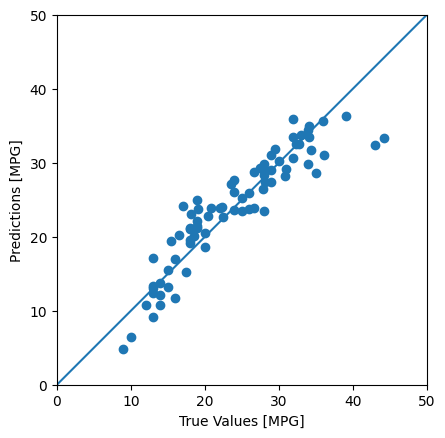

In [109]:
def plot_predictions(y_true, y_pred):

    ax = plt.axes(aspect="equal")
    plt.scatter(y_true, y_pred)
    plt.xlabel("True Values [MPG]")
    plt.ylabel("Predictions [MPG]")
    lims = [0, 50]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims)
    
    
    
    
    
test_predictions = linear_model.predict(standarized_test_features)

plot_predictions(
    y_true=test_labels,
    y_pred=test_predictions,
)


In [110]:
test_results["linear_model"] = mean_squared_error(
    y_true=test_labels,
    y_pred=test_predictions,
)

test_results

{'horsepower_model': 20.829300555790315, 'linear_model': 10.1720922836876}

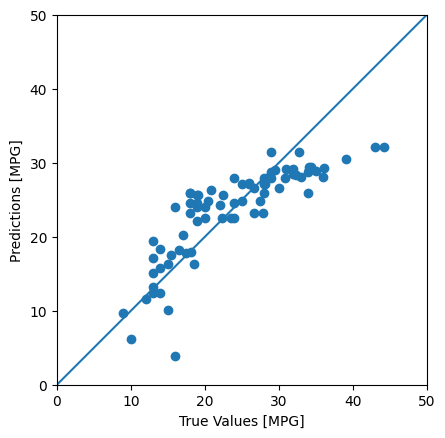

In [111]:

plot_predictions(
    y_true=test_labels,
    y_pred=horsepower_model.predict(standarized_test_horsepower),
)



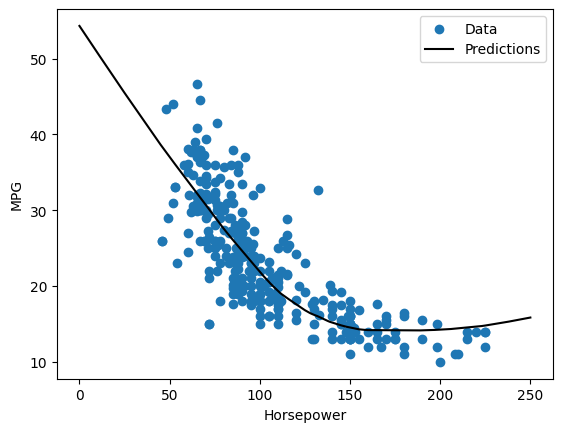

In [112]:
from sklearn.neural_network import MLPRegressor

mlp_horsepower = MLPRegressor(
    max_iter=10000,
    hidden_layer_sizes=(64, 64),
    activation="relu",
    solver="adam",
    learning_rate_init=0.001,
    validation_fraction=0.2,
    early_stopping=True,
    random_state=0,
)
mlp_horsepower.fit(standarized_train_horsepower, train_labels)

y = mlp_horsepower.predict(scaled_x)
plot_horsepower(x, y)

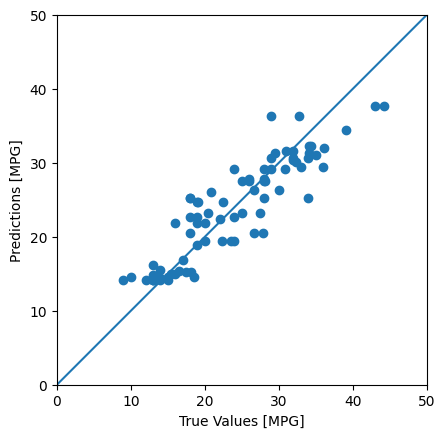

In [113]:

plot_predictions(
    y_true=test_labels,
    y_pred=mlp_horsepower.predict(
        standarized_test_horsepower,
    ),
)

In [114]:
y_pred = mlp_horsepower.predict(standarized_test_horsepower)

test_results["mlp_horsepower"] = mean_squared_error(
    y_true=test_labels,
    y_pred=y_pred,
)

test_results


{'horsepower_model': 20.829300555790315,
 'linear_model': 10.1720922836876,
 'mlp_horsepower': 12.806525974883082}

In [115]:
mlp = MLPRegressor(
    max_iter=10000,
    hidden_layer_sizes=(64, 64),
    activation="relu",
    solver="adam",
    learning_rate_init=0.001,
    validation_fraction=0.2,
    early_stopping=True,
    random_state=0,
)
mlp.fit(standarized_train_features, train_labels)

MLPRegressor(early_stopping=True, hidden_layer_sizes=(64, 64), max_iter=10000,
             random_state=0, validation_fraction=0.2)

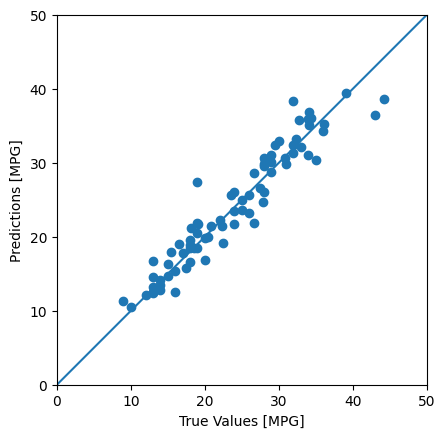

In [116]:

test_predictions = mlp.predict(standarized_test_features)

plot_predictions(
    y_true=test_labels,
    y_pred=test_predictions,
)



In [117]:

test_results["mlp"] = mean_squared_error(
    y_true=test_labels,
    y_pred=test_predictions,
)

test_results


{'horsepower_model': 20.829300555790315,
 'linear_model': 10.1720922836876,
 'mlp_horsepower': 12.806525974883082,
 'mlp': 5.9546887276800575}

In [118]:
pd.DataFrame(test_results, index=["Mean squared error [MPG]"]).T

,Mean squared error [MPG]
horsepower_model,20.829301
linear_model,10.172092
mlp_horsepower,12.806526
mlp,5.954689


In [119]:
import pickle

with open("mlp.pickle", "wb") as file:
    pickle.dump(mlp, file)

with open("features_scaler.pickle", "wb") as file:
    pickle.dump(features_scaler, file)
    
    

In [120]:
    
import pandas as pd

dataset = pd.read_csv("../files/input/auto_mpg.csv")
dataset = dataset.dropna()
dataset["Origin"] = dataset["Origin"].map(
    {1: "USA", 2: "Europe", 3: "Japan"},
)
dataset = pd.get_dummies(dataset, columns=["Origin"], prefix="", prefix_sep="")
y_true = dataset.pop("MPG")


with open("mlp.pickle", "rb") as file:
    new_mlp = pickle.load(file)

with open("features_scaler.pickle", "rb") as file:
    new_features_scaler = pickle.load(file)

standarized_dataset = new_features_scaler.transform(dataset)
y_pred = mlp.predict(standarized_dataset)

mean_squared_error(
    y_true=y_true,
    y_pred=y_pred,
)    
    

7.744565284379876